In [38]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
import scienceplots
import gmpy2 as gm

# Science plot package + Dracula theme
plt.style.use(['science', 'dark_background'])
plt.rcParams['axes.facecolor'] = '#282a36'
plt.rcParams['figure.facecolor'] = '#282a36'
colorcycle = ['#8be9fd', '#ff79c6', '#50fa7b', '#bd93f9', '#ffb86c', '#ff5555', '#f1fa8c', 
'#6272a4']
plt.rcParams['axes.prop_cycle'] = mpl.cycler(color=colorcycle)
white = '#f8f8f2' # foreground

# change dpi
plt.rcParams['figure.dpi'] = 1024

9.324847625269344e+157
727.4770844500157
868.53487750710849
-2.428356945103701


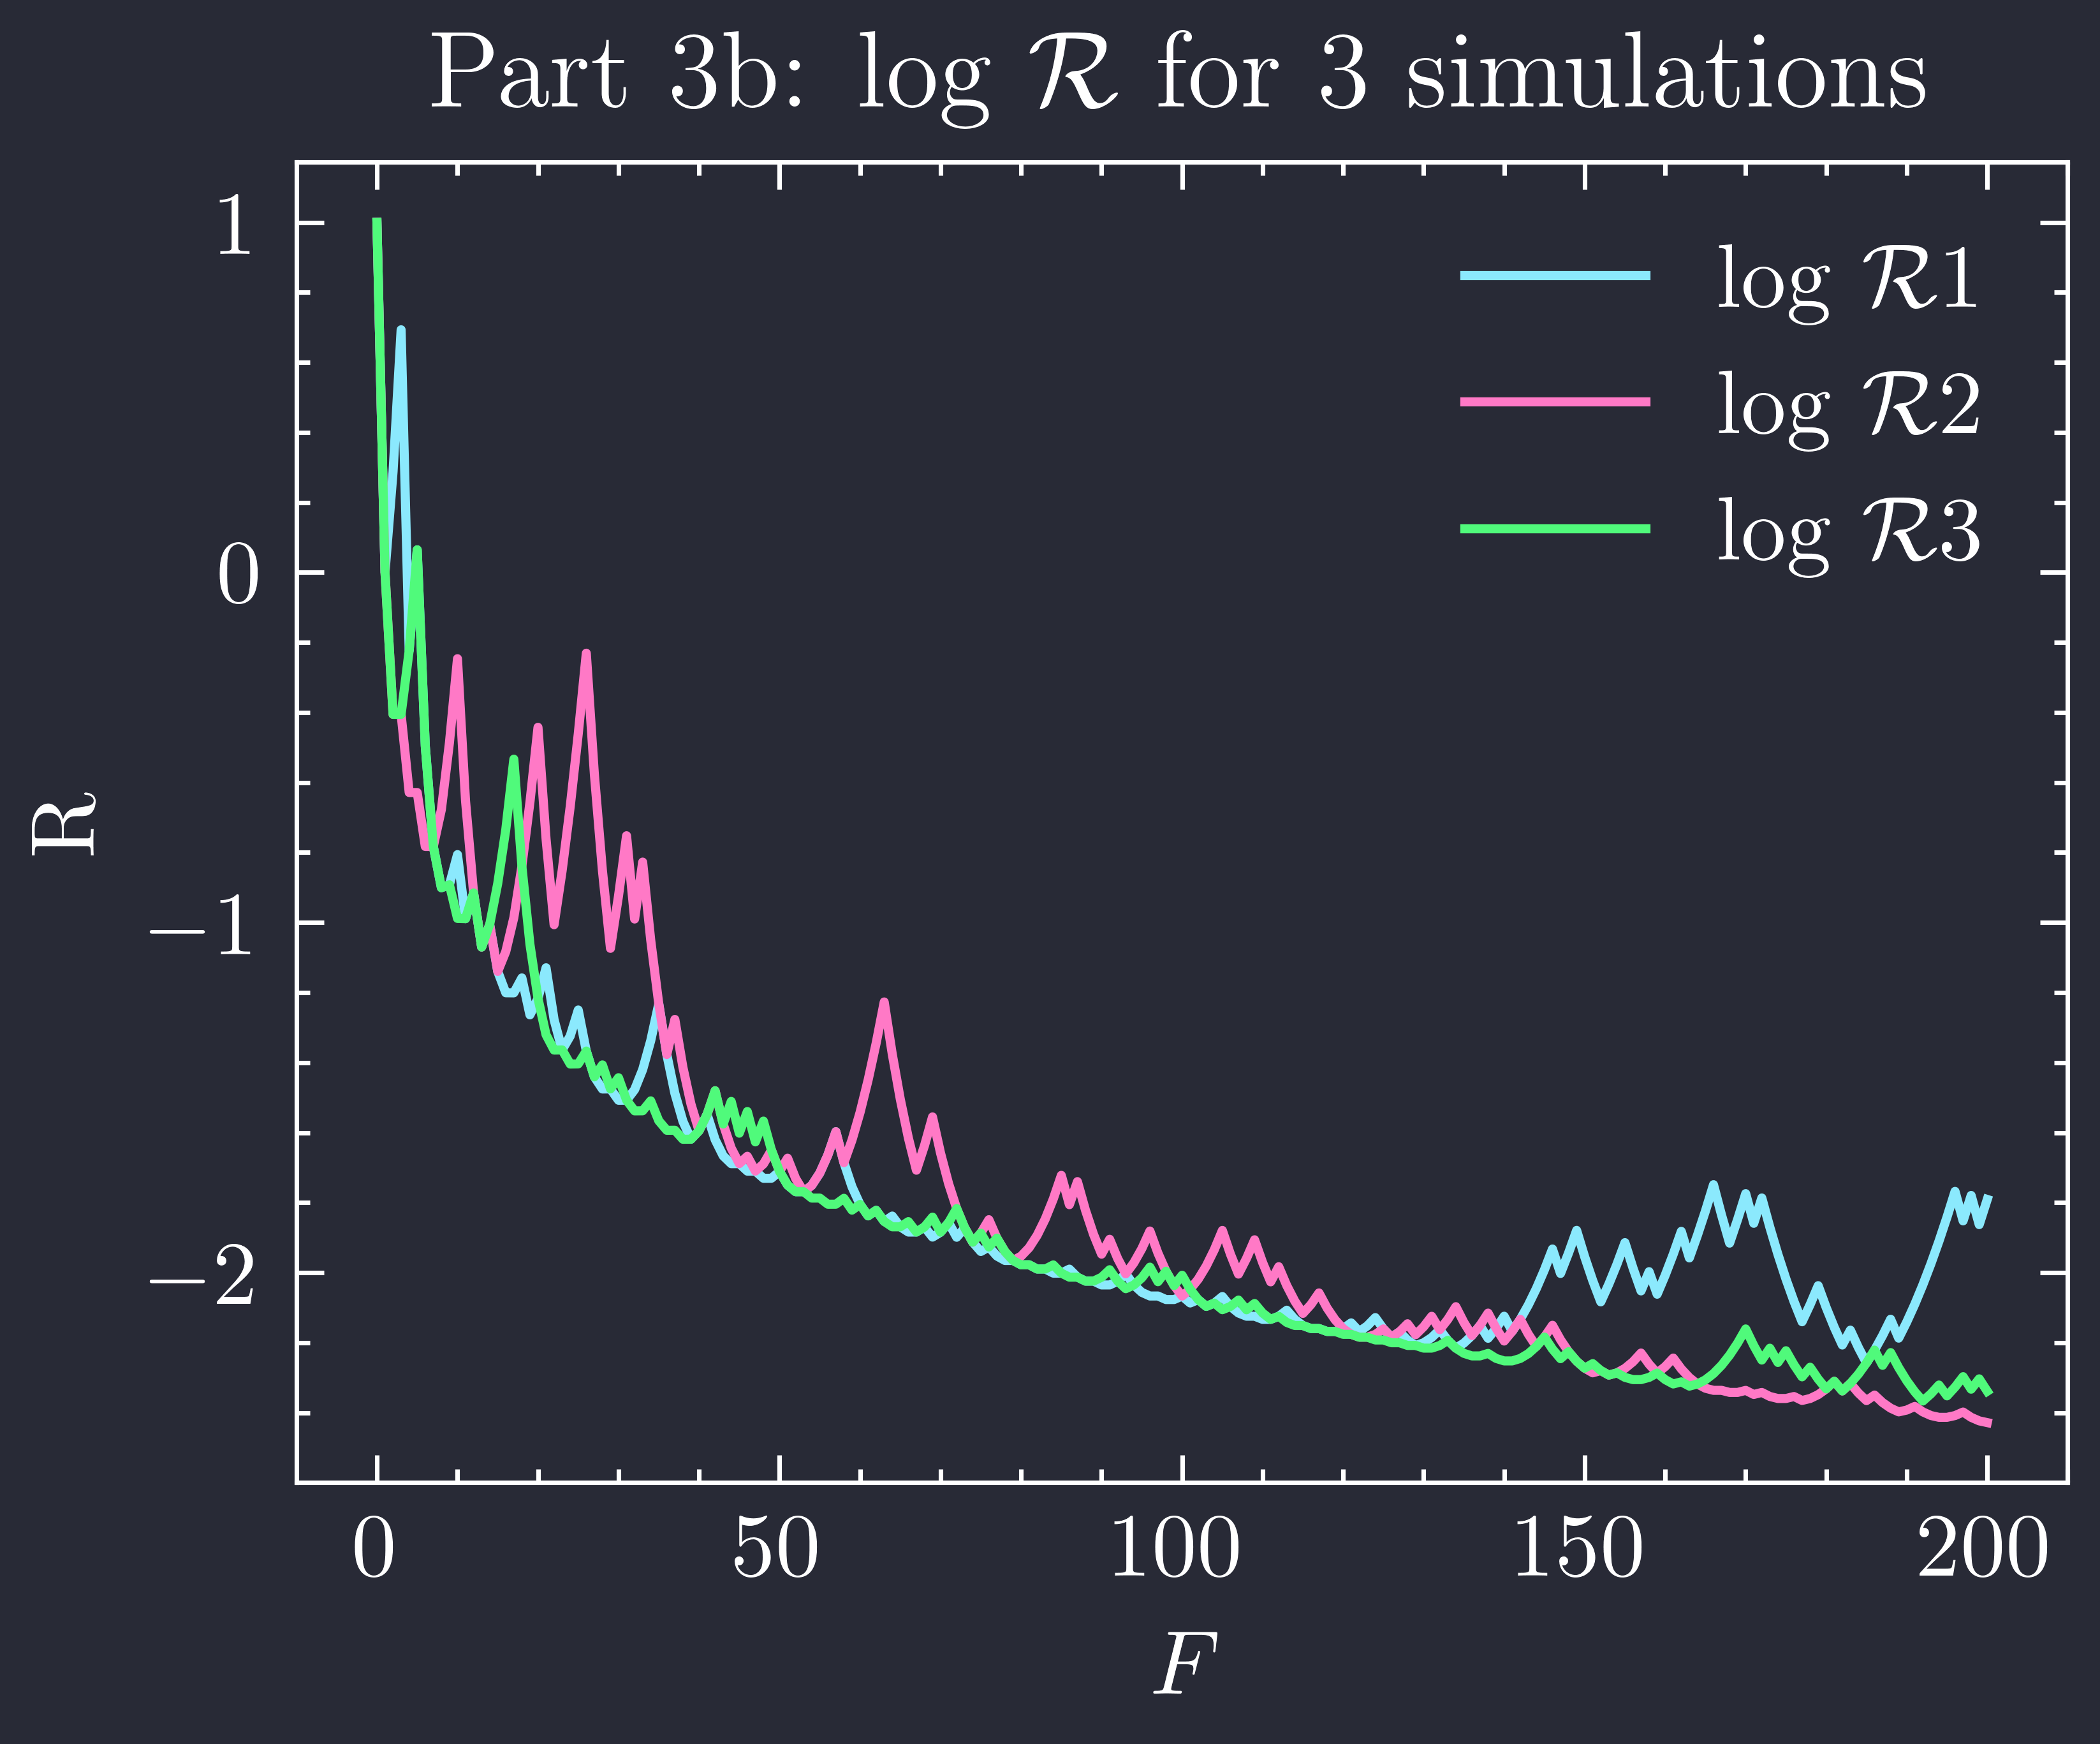

In [202]:
# 3b
# Calculating the ratio R
# Stirling's approximation
def power(n, exp):
    result = 1
    for _ in range(exp):
        result = gm.mul(n, result)
    return result

def fact(n):
    if n < 10:
        return np.math.factorial(n)
    a = power(n, n)
    b = gm.exp(-n)
    c = gm.sqrt(2 * np.pi * n)
    return a * b * c

def logratio(F_a,F_b):
    return (F_a + F_b) * gm.log(2) + gm.log(fact(F_a)) + gm.log(fact(F_b)) - gm.log(fact(F_a + F_b + 1))

def flip():
    if np.random.rand() < 0.5:
        return 1
    else:
        return 0
    
def simulate(n):
    F_a = 0
    F_b = 0
    R = [1]
    for i in range(n):
        if flip():
            F_a += 1
        else:
            F_b += 1
        R.append(logratio(F_a,F_b))
    return R
print(fact(100))
print(2 * gm.log(fact(100)))
print(gm.log(fact(201)))
print(logratio(100, 100))
# numpy array with 1 to 200 on the x-axis
n = np.arange(0, 201)
# calculate the ratio for each n
# R = simulate(200)
# simulating 3 times and plotting them side by side
plt.figure()
for i in range(3):
    R = simulate(200)
    # Plot on the first subplot
    plt.plot(n, R, label='log $\mathcal{R}$' + str(i+1))
    plt.xlabel('$F$')
    plt.ylabel('R') 
plt.title('Part 3b: log $\mathcal{R}$ for 3 simulations')
plt.legend()
plt.show()

# plot the ratio
# plt.plot(n, R, label='R')
# plt.xlabel('$F$')
# plt.ylabel('R')
# plt.legend()
# plt.show()

725059021818600.5
0.68123652683318869


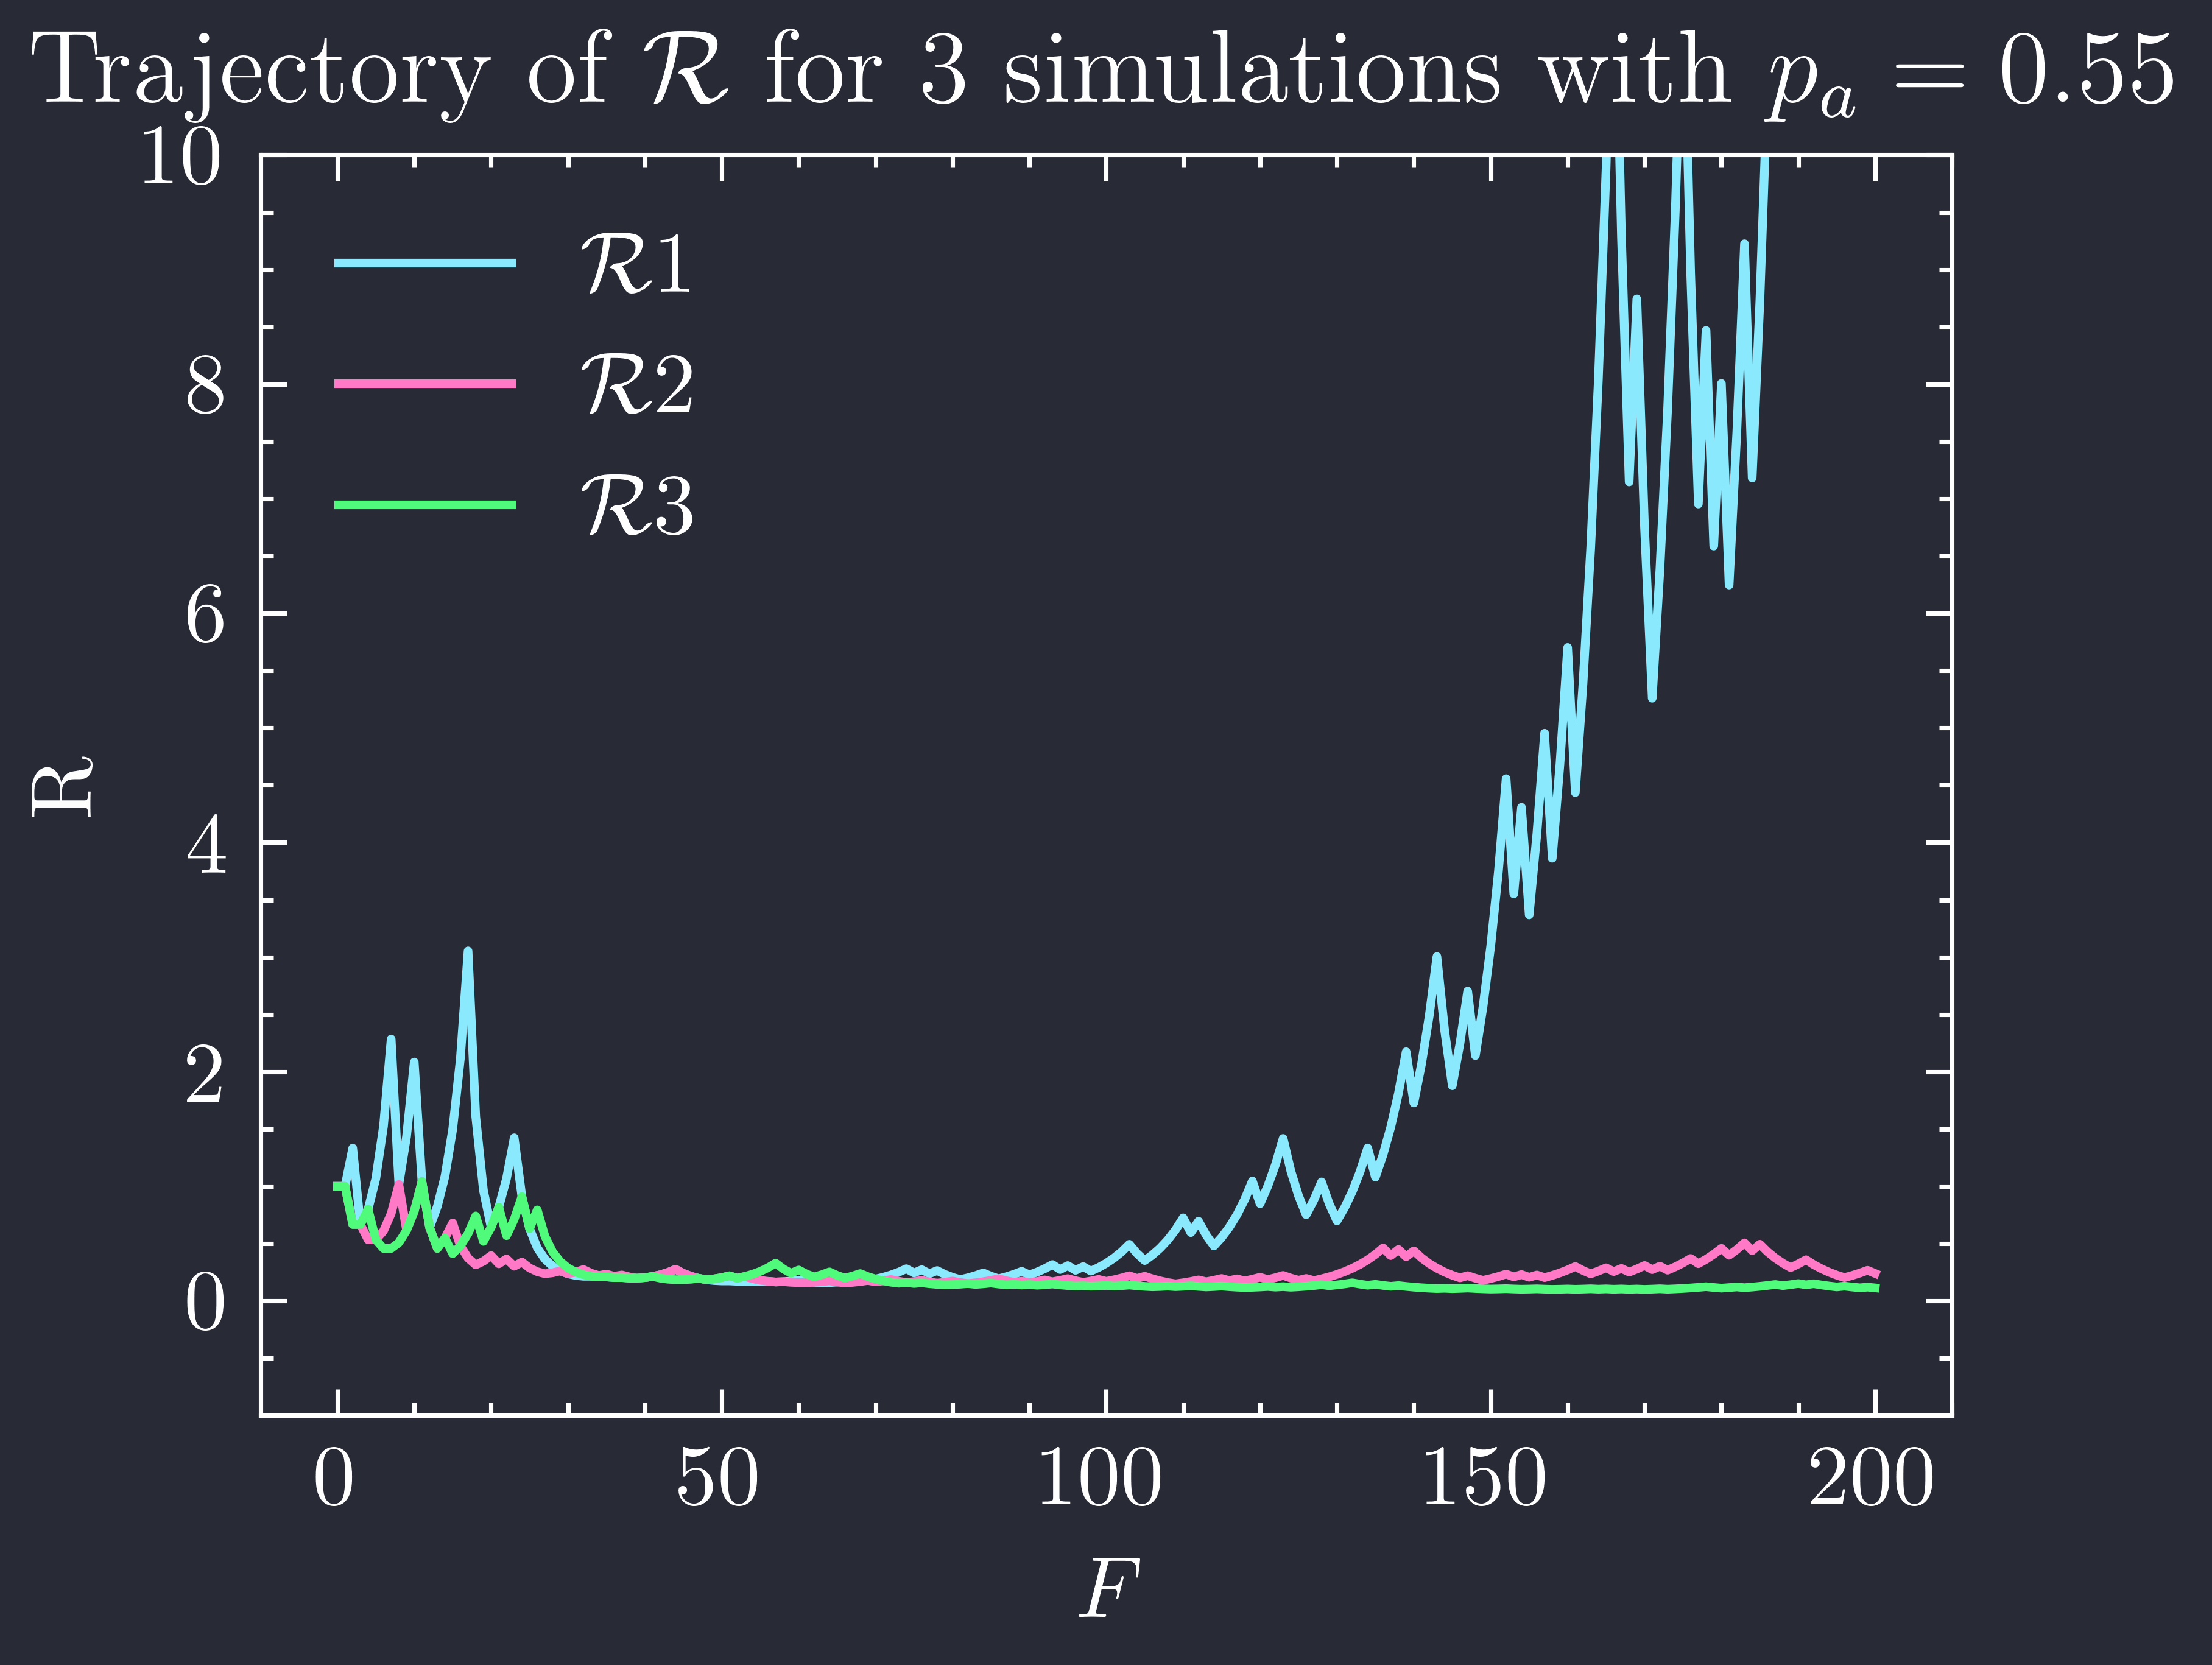

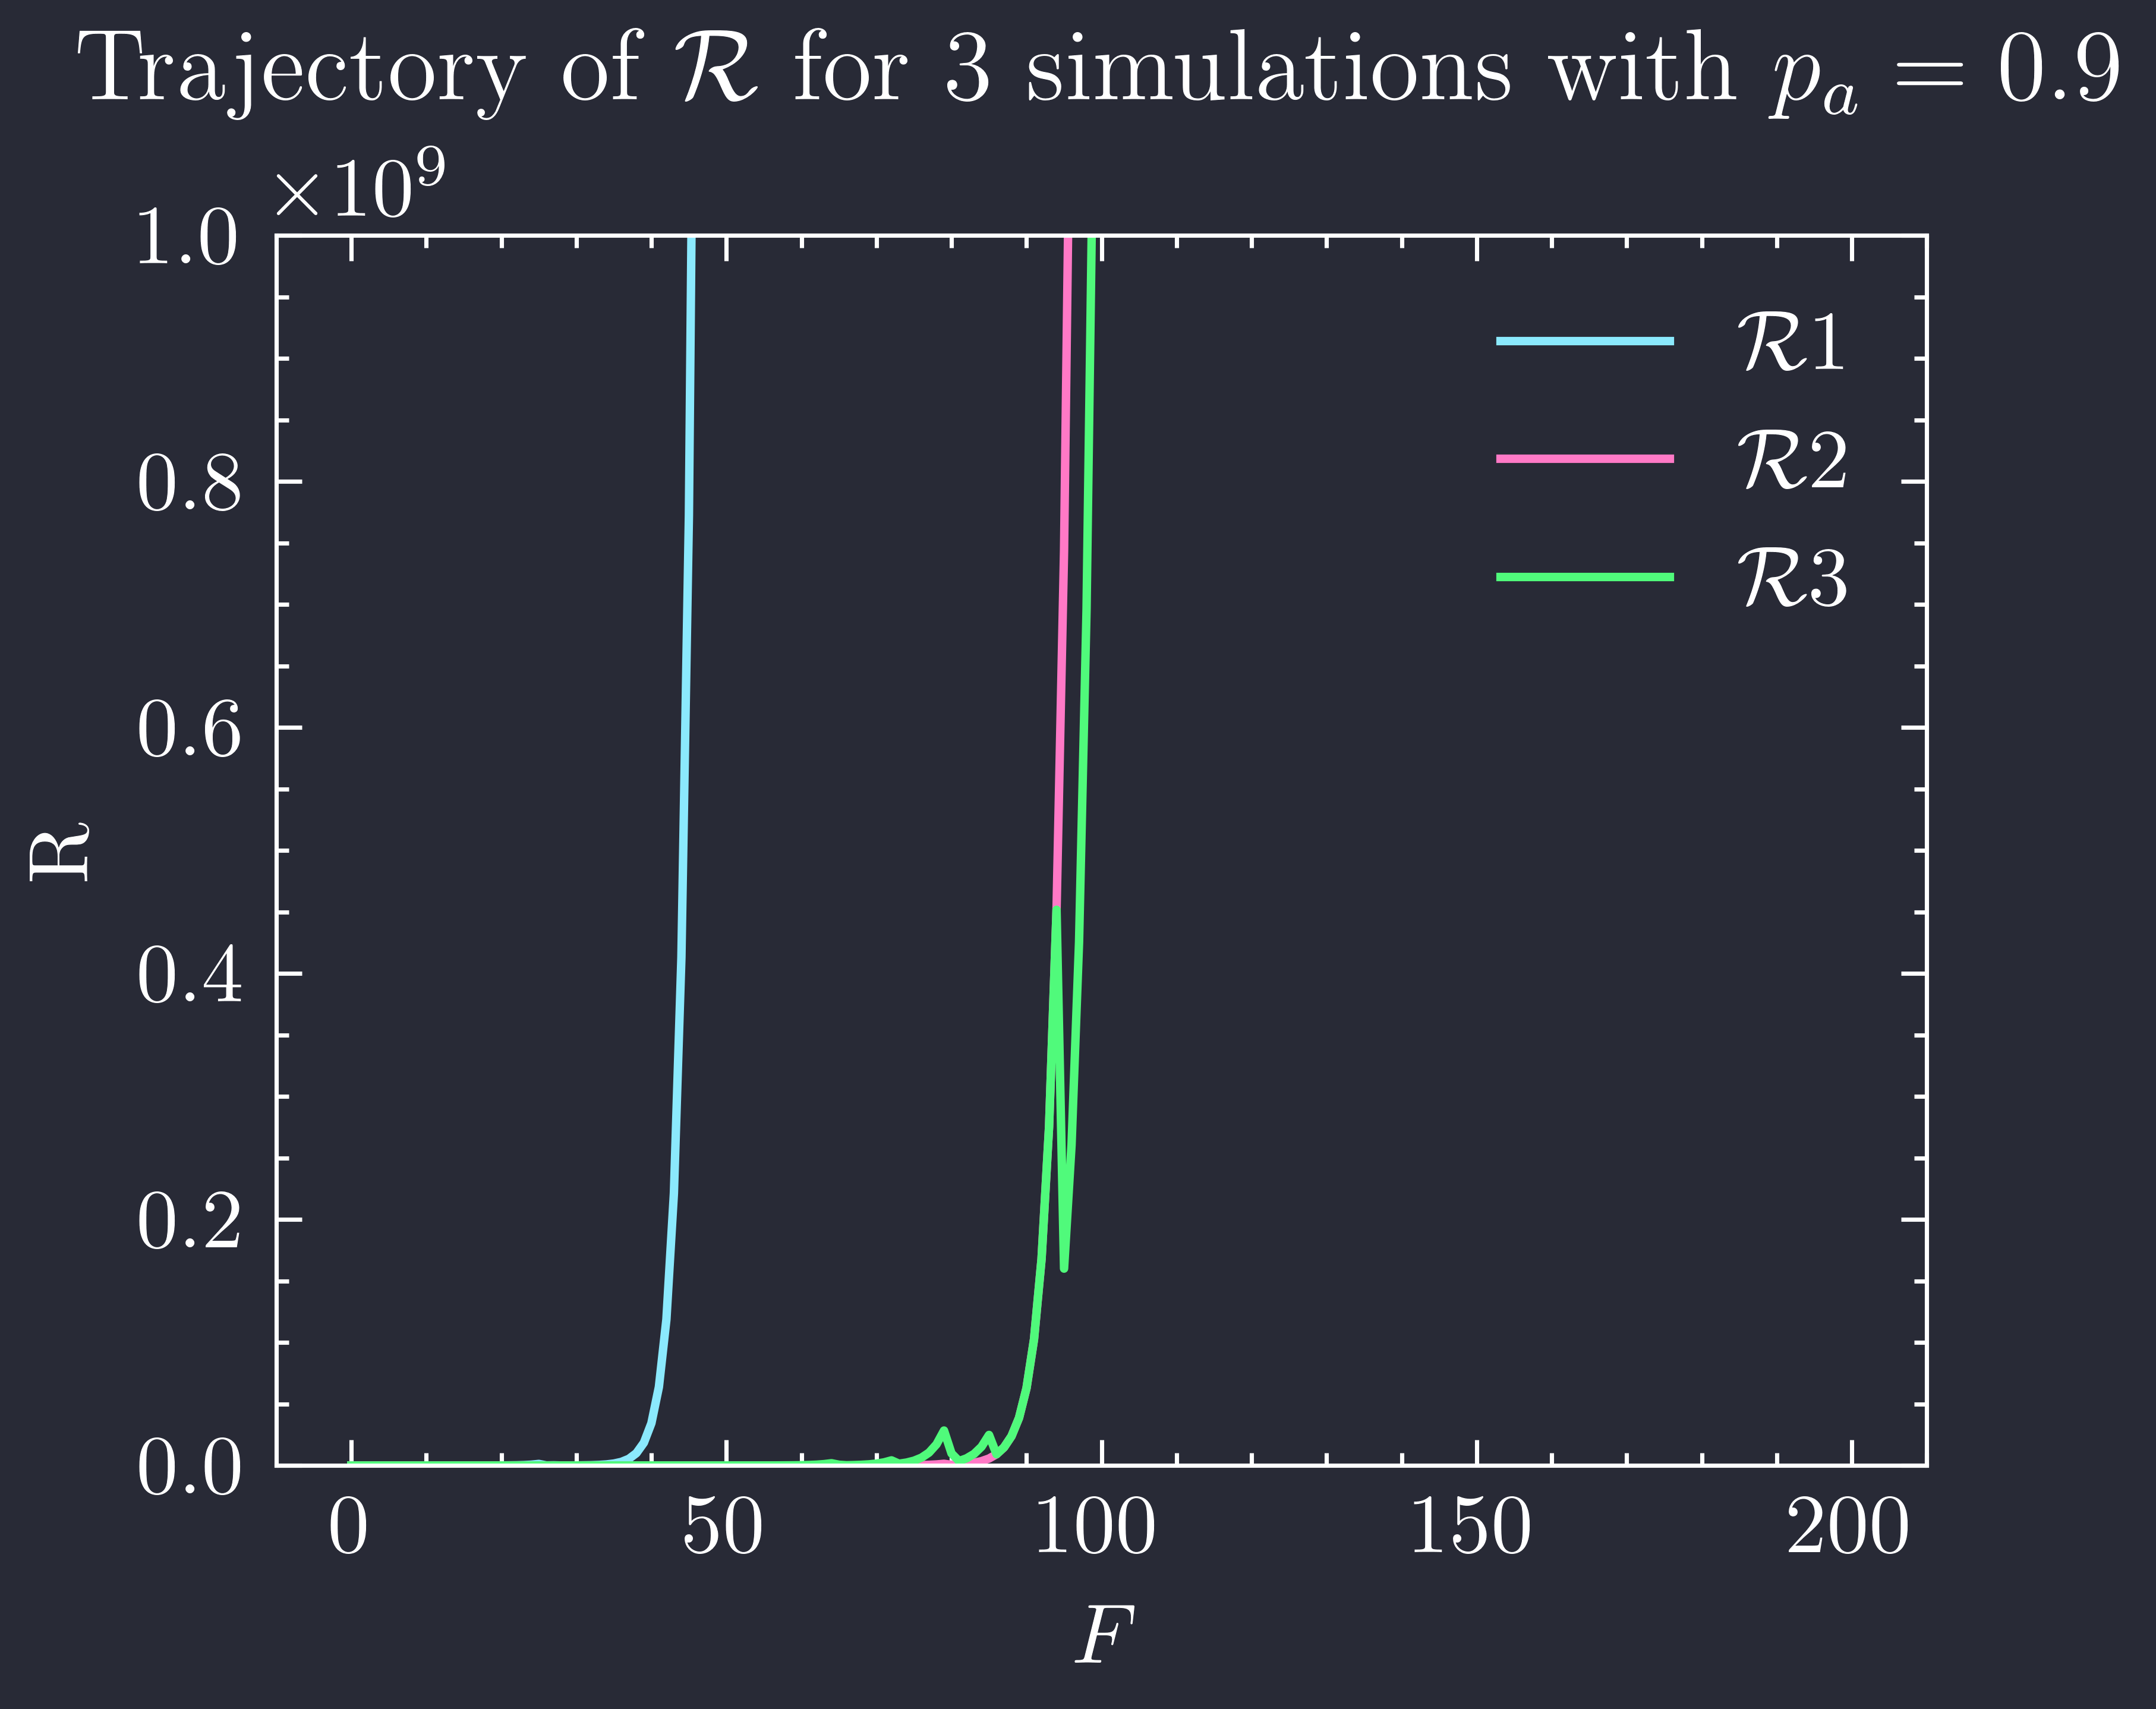

In [212]:
# for p_a = 0.55
def bflip():
    if np.random.rand() < 0.55:
        return 1
    else:
        return 0
    
def vbflip():
    if np.random.rand() < 0.9:
        return 1
    else:
        return 0

Fa_toss_count_55 = []
Fa_toss_count_90 = []

def ratio(F_a,F_b):
    return fact(F_a) * fact(F_b) / fact(F_a + F_b + 1) * 2 ** (F_a + F_b)

def simulate_b(n):
    F_a = 0
    F_b = 0
    R = [1]
    for i in range(n):
        if bflip():
            F_a += 1
        else:
            F_b += 1
        R = np.append(R, ratio(F_a,F_b))
    return R, F_a

print(2 ** 100 * gm.factorial(90) * gm.factorial(10) / gm.factorial(101))

print(2 ** 500 * gm.factorial(275) * gm.factorial(225) / gm.factorial(501))
def simulate_vb(n):
    F_a = 0
    F_b = 0
    R = [1]
    for i in range(n):
        if vbflip():
            F_a += 1
        else:
            F_b += 1
        R = np.append(R, ratio(F_a,F_b))
    return R, F_a

# simulating 3 times and plotting them
plt.figure()
for i in range(3):
    R, F_a = simulate_b(200)
    Fa_toss_count_55.append(F_a)
    plt.plot(n, R, label='$\mathcal{R}$' + str(i+1))
plt.xlabel('$F$')
plt.ylabel('R')
plt.title('Trajectory of $\mathcal{R}$ for 3 simulations with $p_a = 0.55$')
plt.ylim(-1, 10)
plt.legend()

# for p_a = 0.9
plt.figure()
for i in range(3):
    R, F_a = simulate_vb(200)
    Fa_toss_count_90.append(F_a)
    plt.plot(n, R, label='$\mathcal{R}$' + str(i+1))
plt.xlabel('$F$')
plt.ylabel('R')
plt.title('Trajectory of $\mathcal{R}$ for 3 simulations with $p_a = 0.9$')
plt.legend()
plt.ylim(0, 1e9)
plt.show()

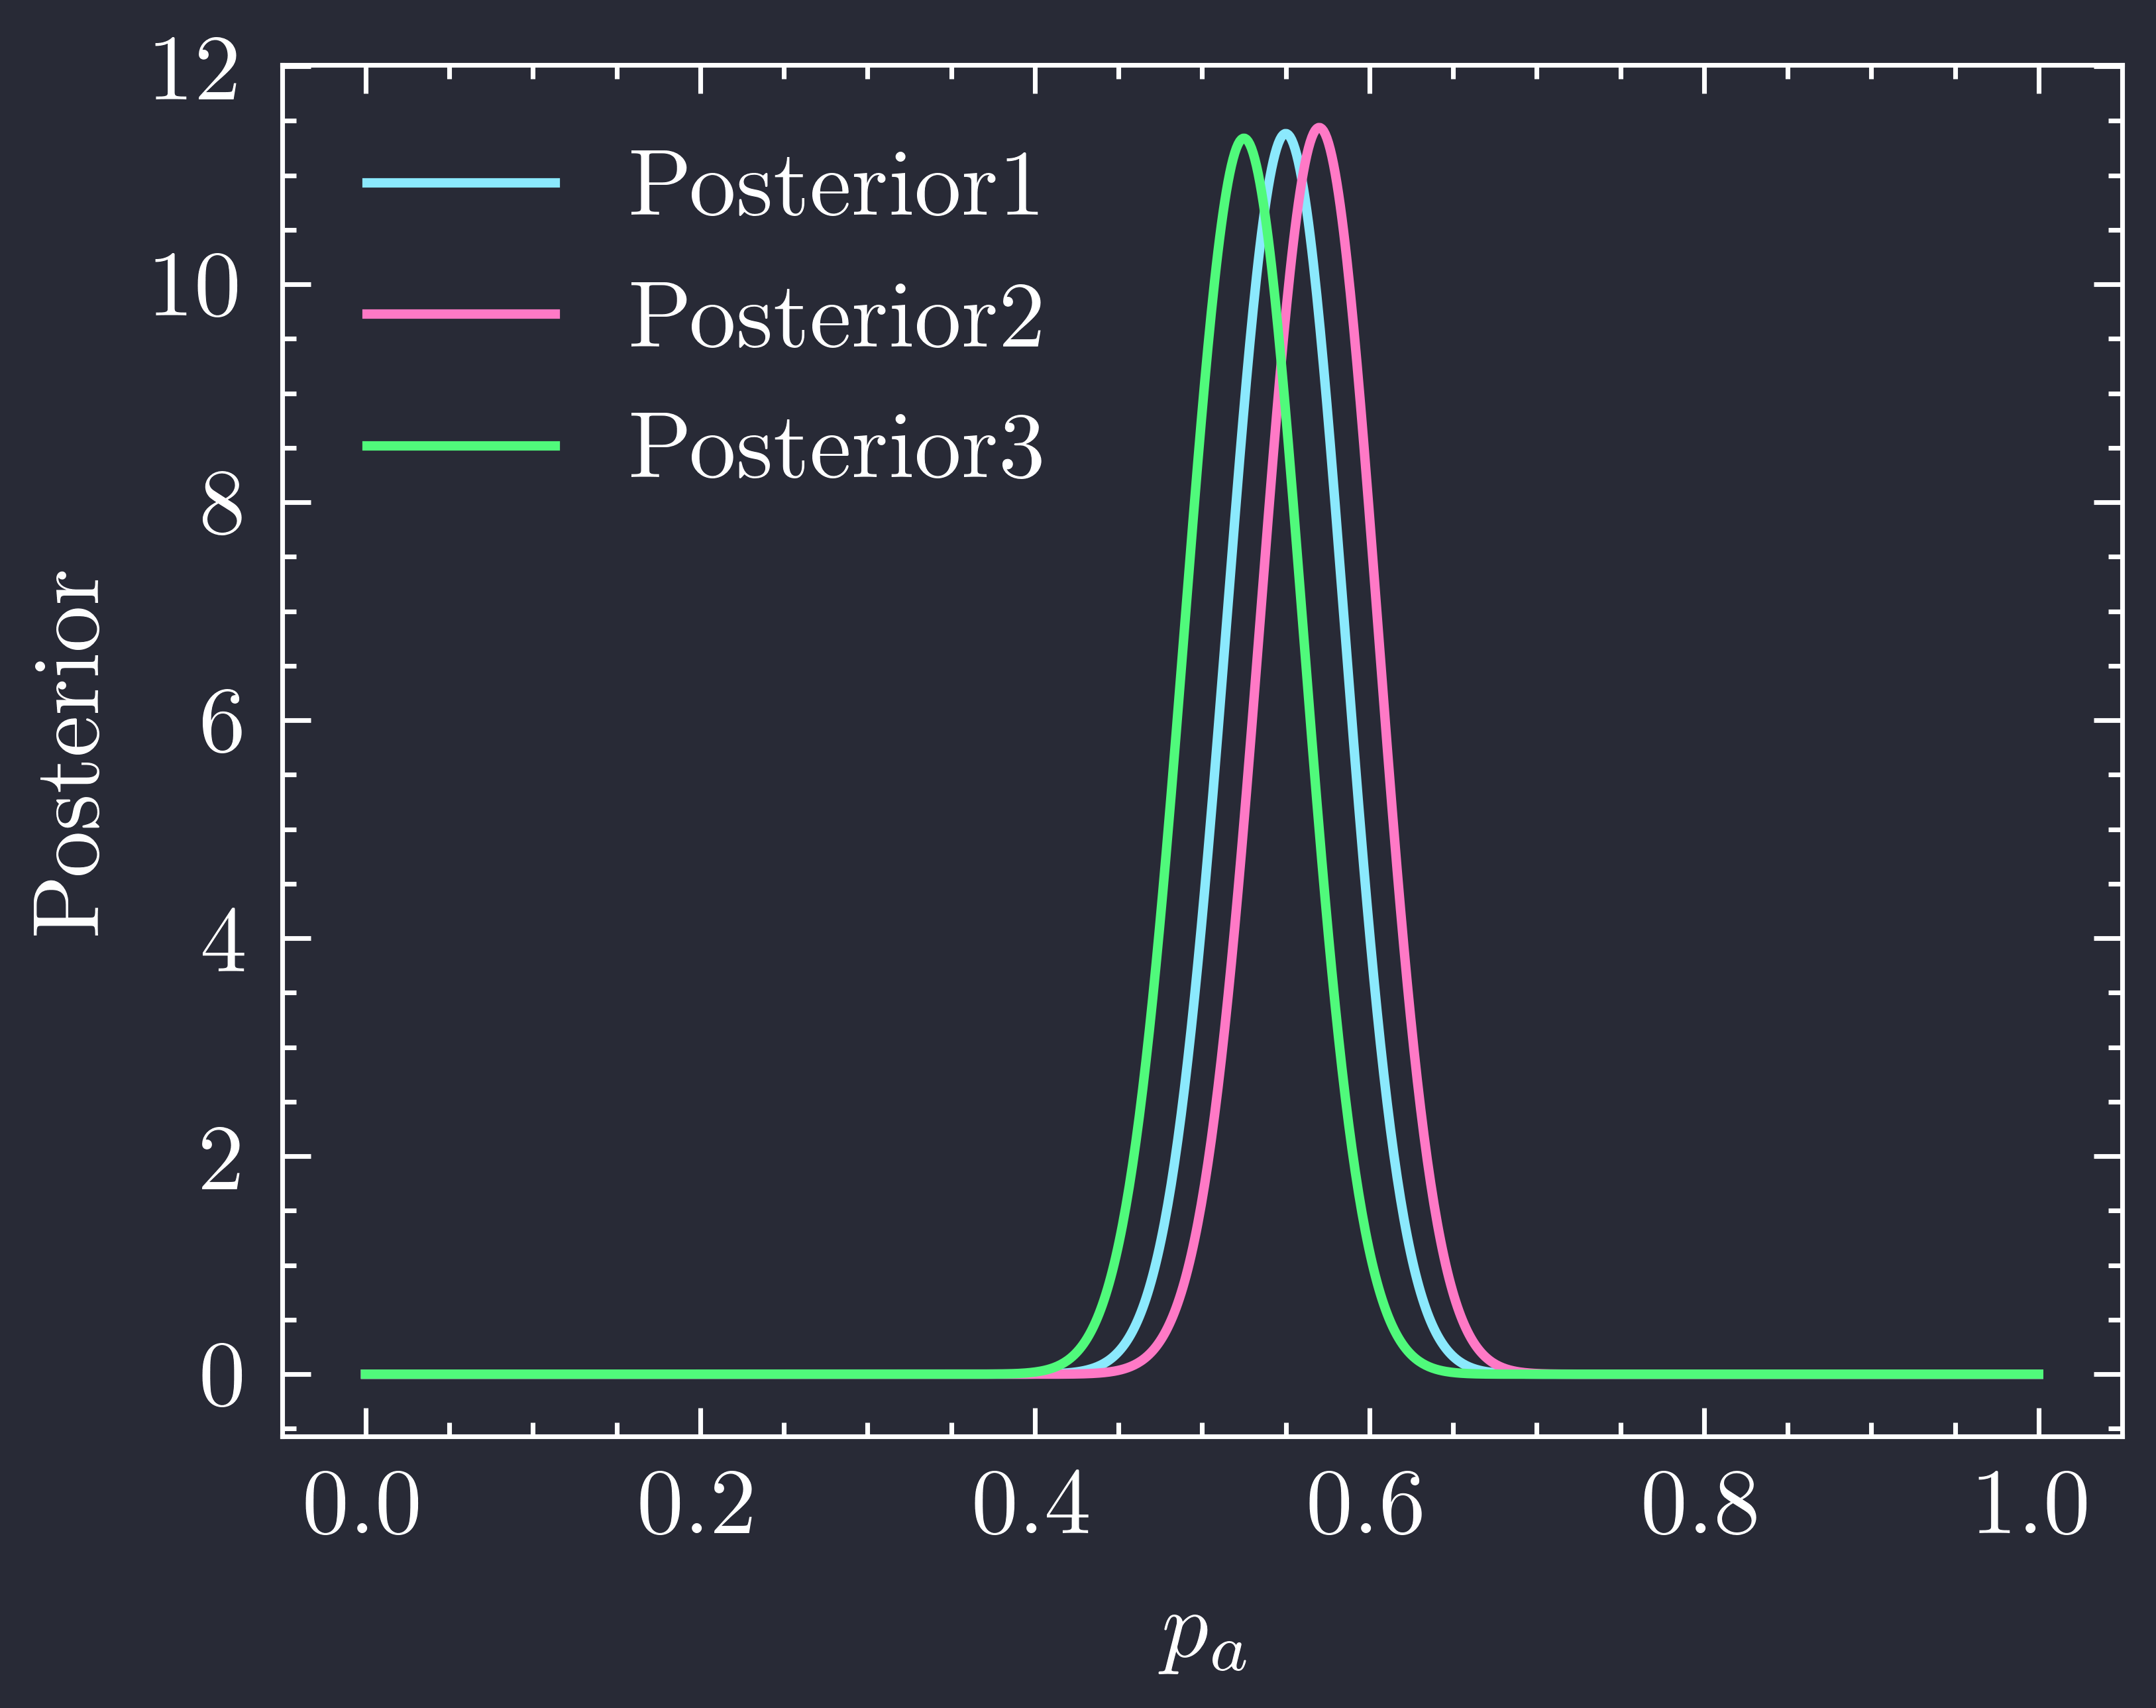

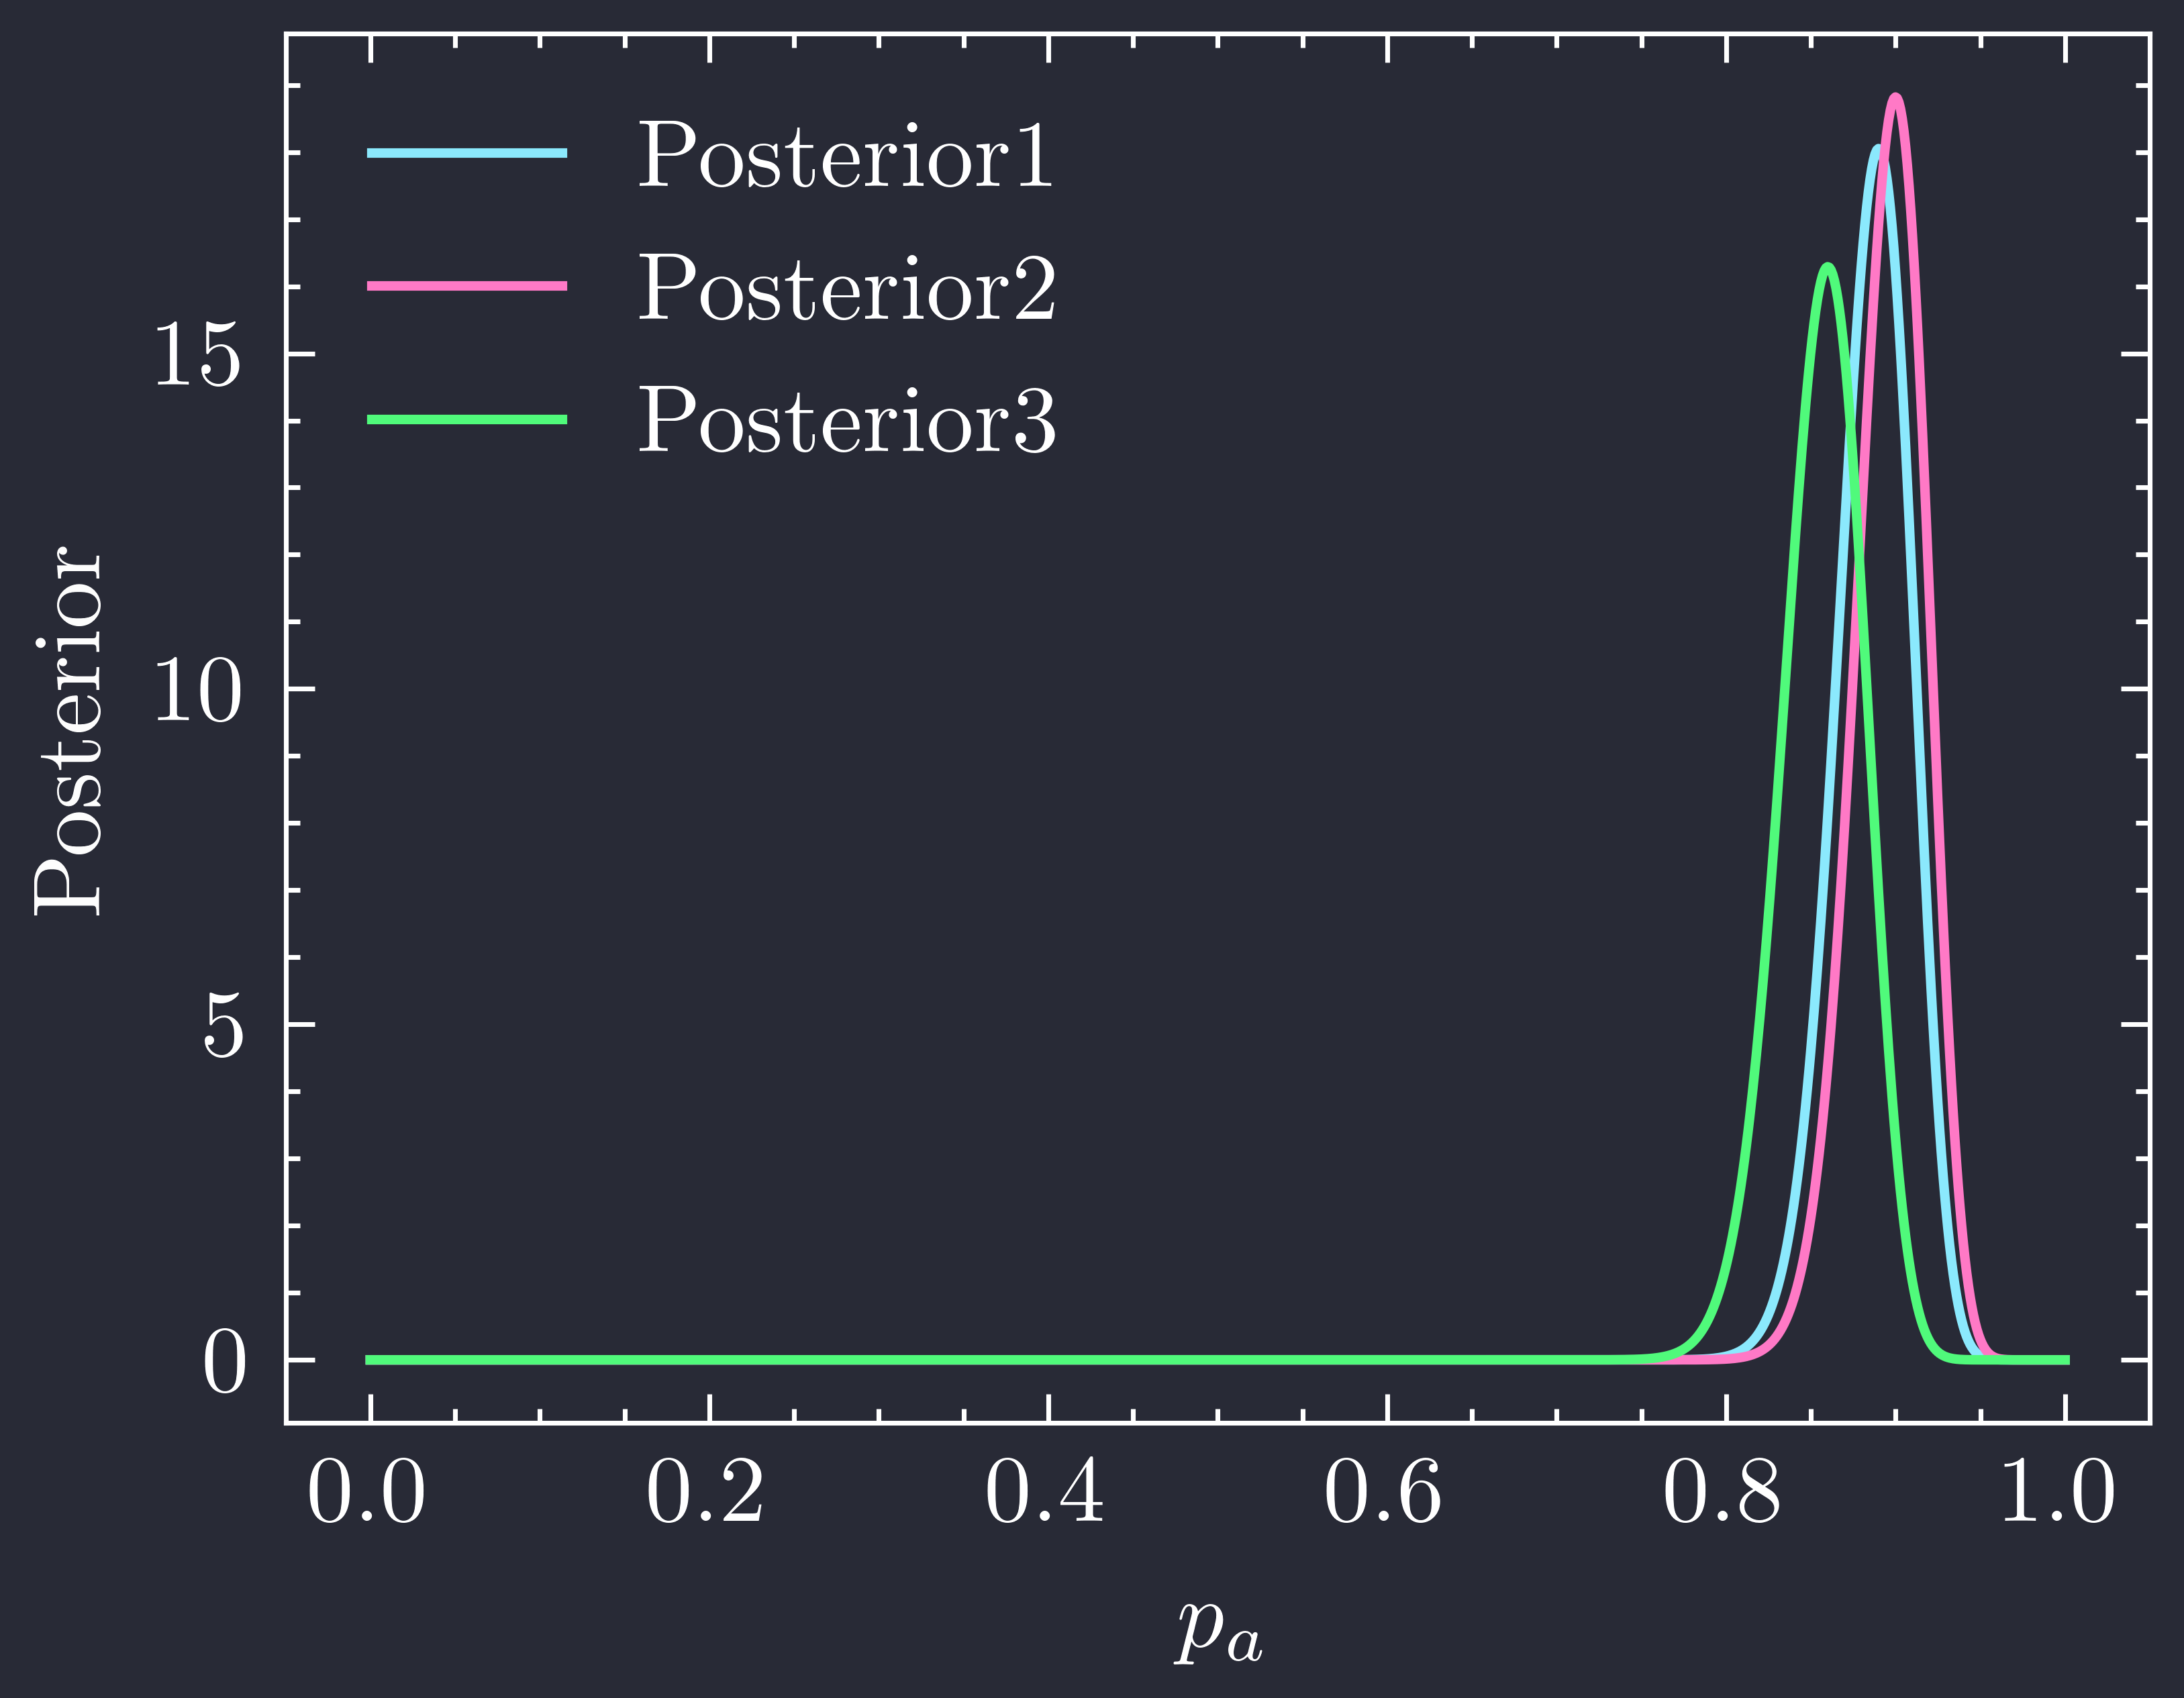

In [185]:
# posterior distribution for p_a = 0.55
def normalconst(F_a):
    return gm.factorial(F_a) * gm.factorial(200 - F_a) / gm.factorial(201)

def posterior(F_a, p_a):
    return p_a ** (F_a) * (1 - p_a) ** (200 - F_a) / normalconst(F_a) 

for i, F_a in enumerate(Fa_toss_count_55):
    p_a = np.linspace(0, 1, 1000)
    plt.plot(p_a, posterior(F_a, p_a), label='Posterior' + str(i+1))
plt.xlabel('$p_a$')
plt.ylabel('Posterior')
plt.legend()
plt.show()

# posterior distribution for p_a = 0.9
for i, F_a in enumerate(Fa_toss_count_90):
    p_a = np.linspace(0, 1, 1000)
    plt.plot(p_a, posterior(F_a, p_a), label='Posterior' + str(i+1))
plt.xlabel('$p_a$')
plt.ylabel('Posterior')
plt.legend()
plt.show()

3599.9999999999936
1599.9999999999973


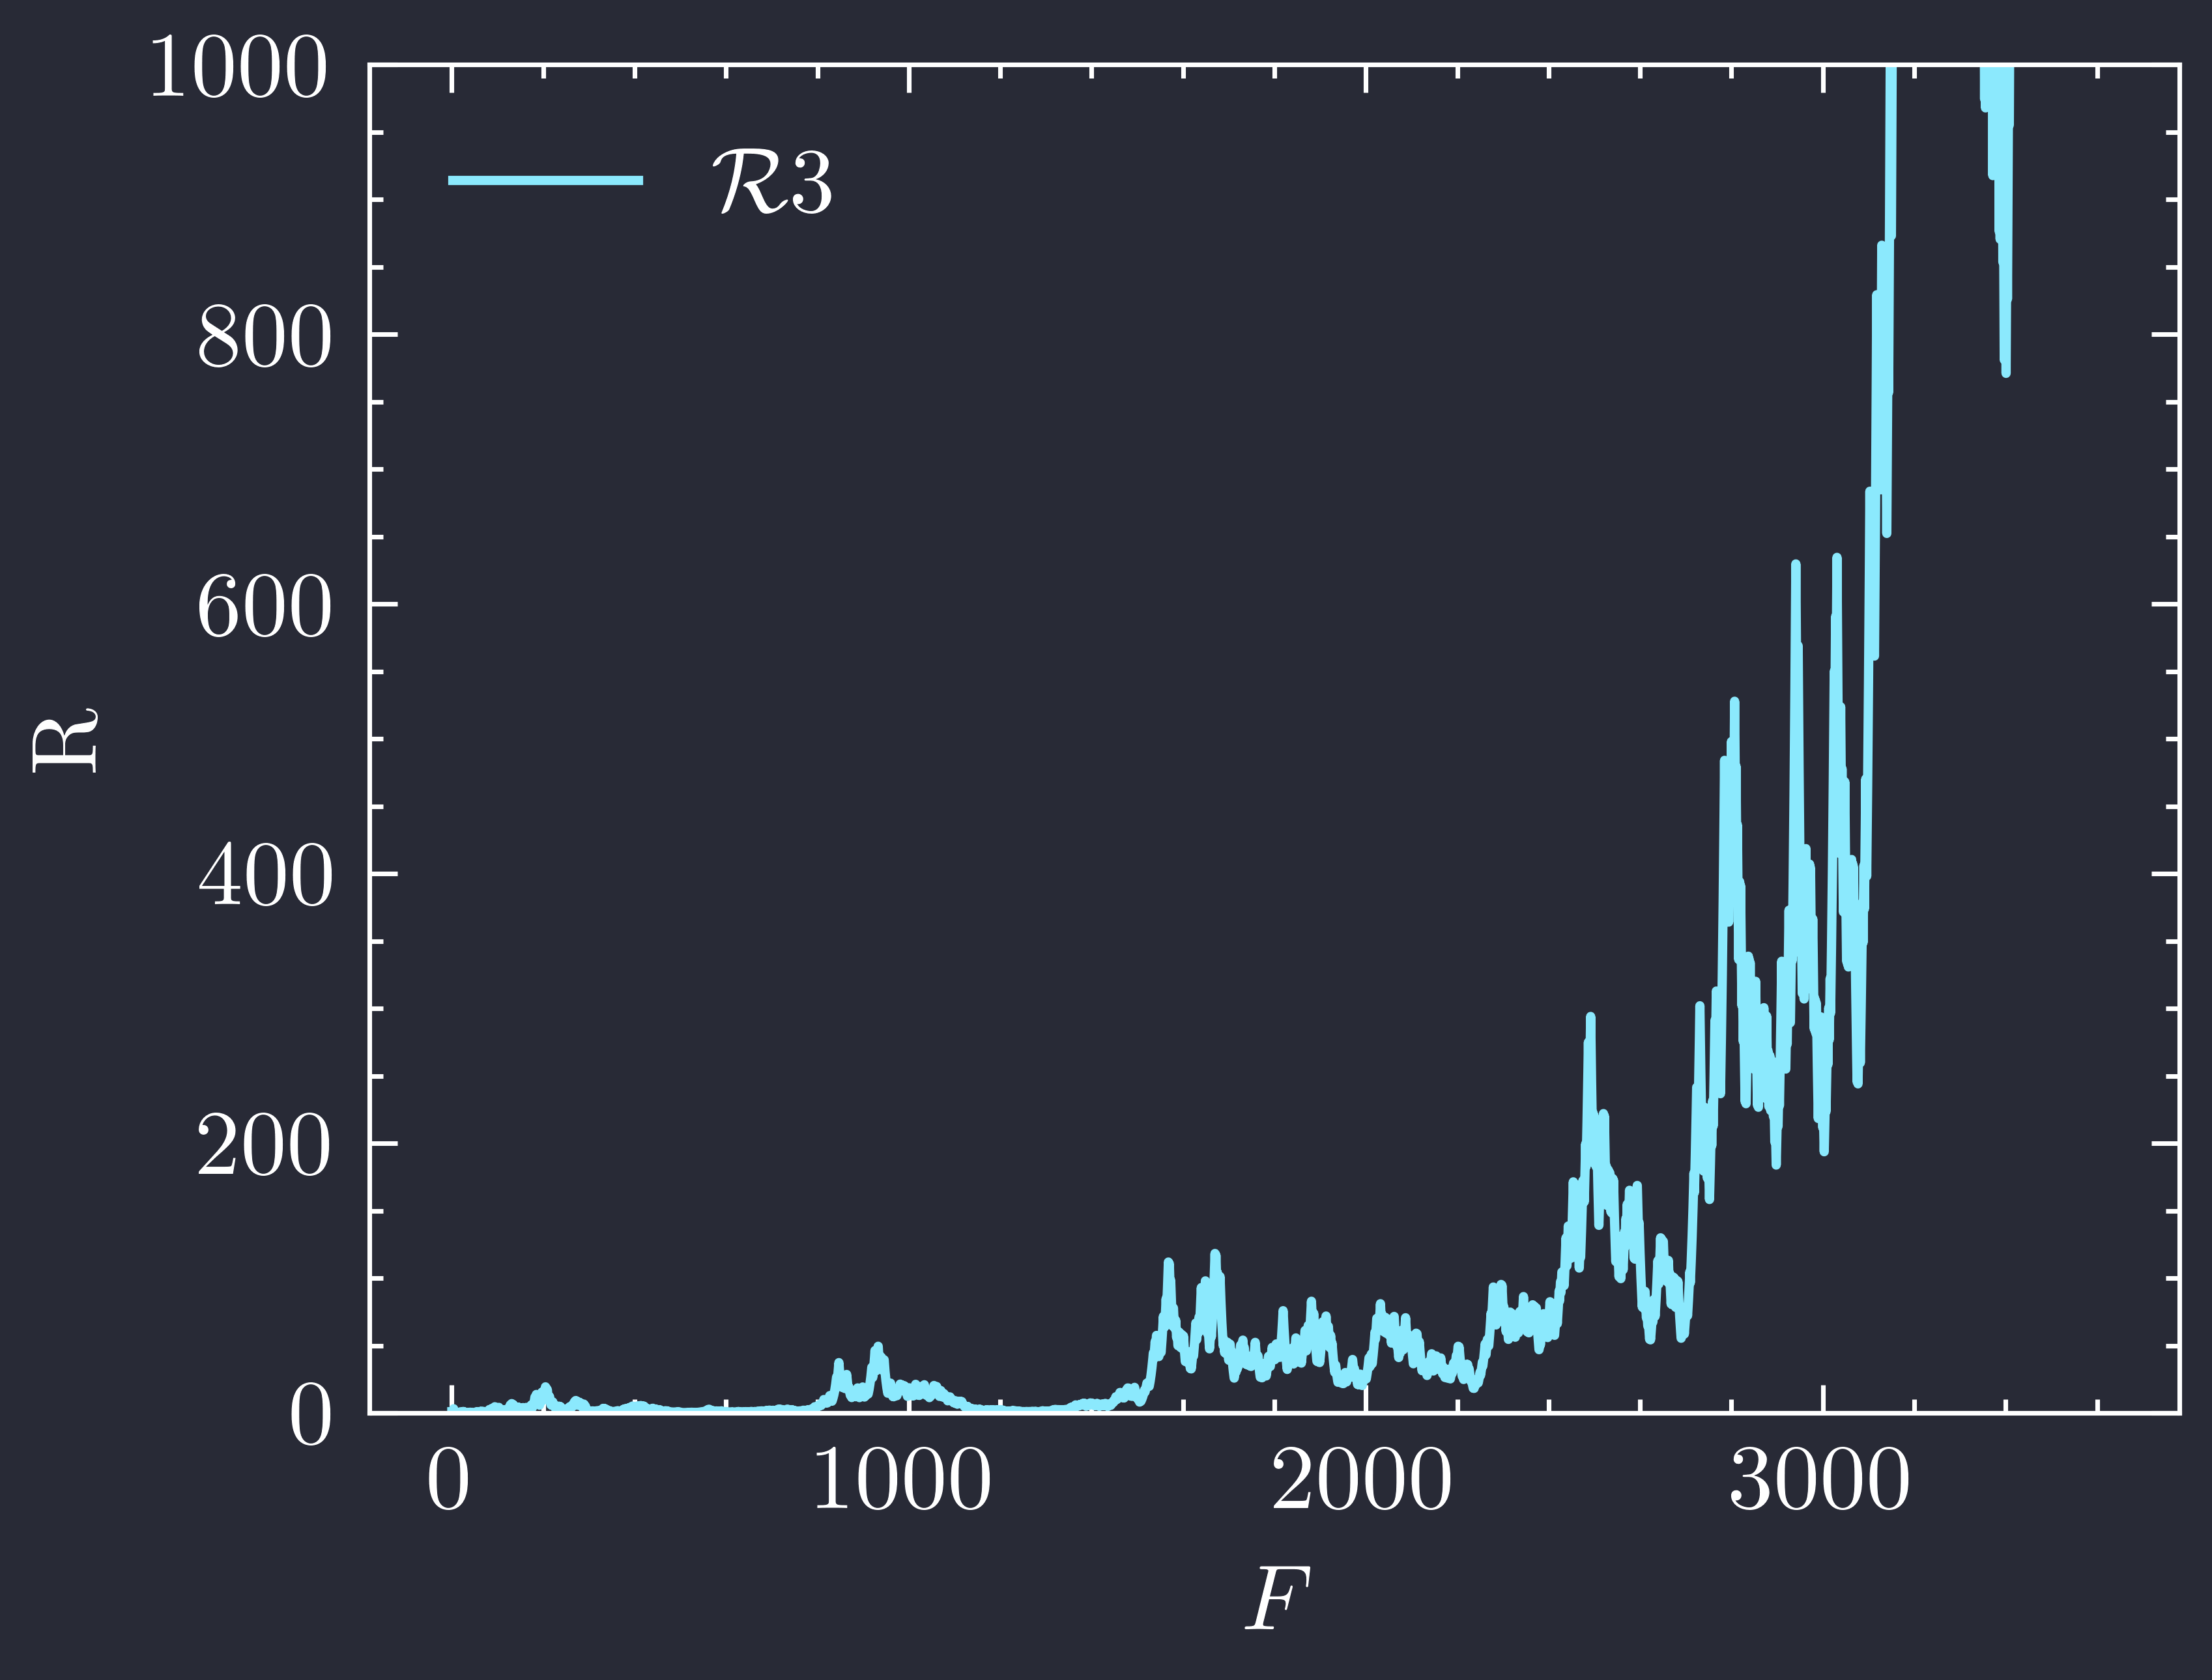

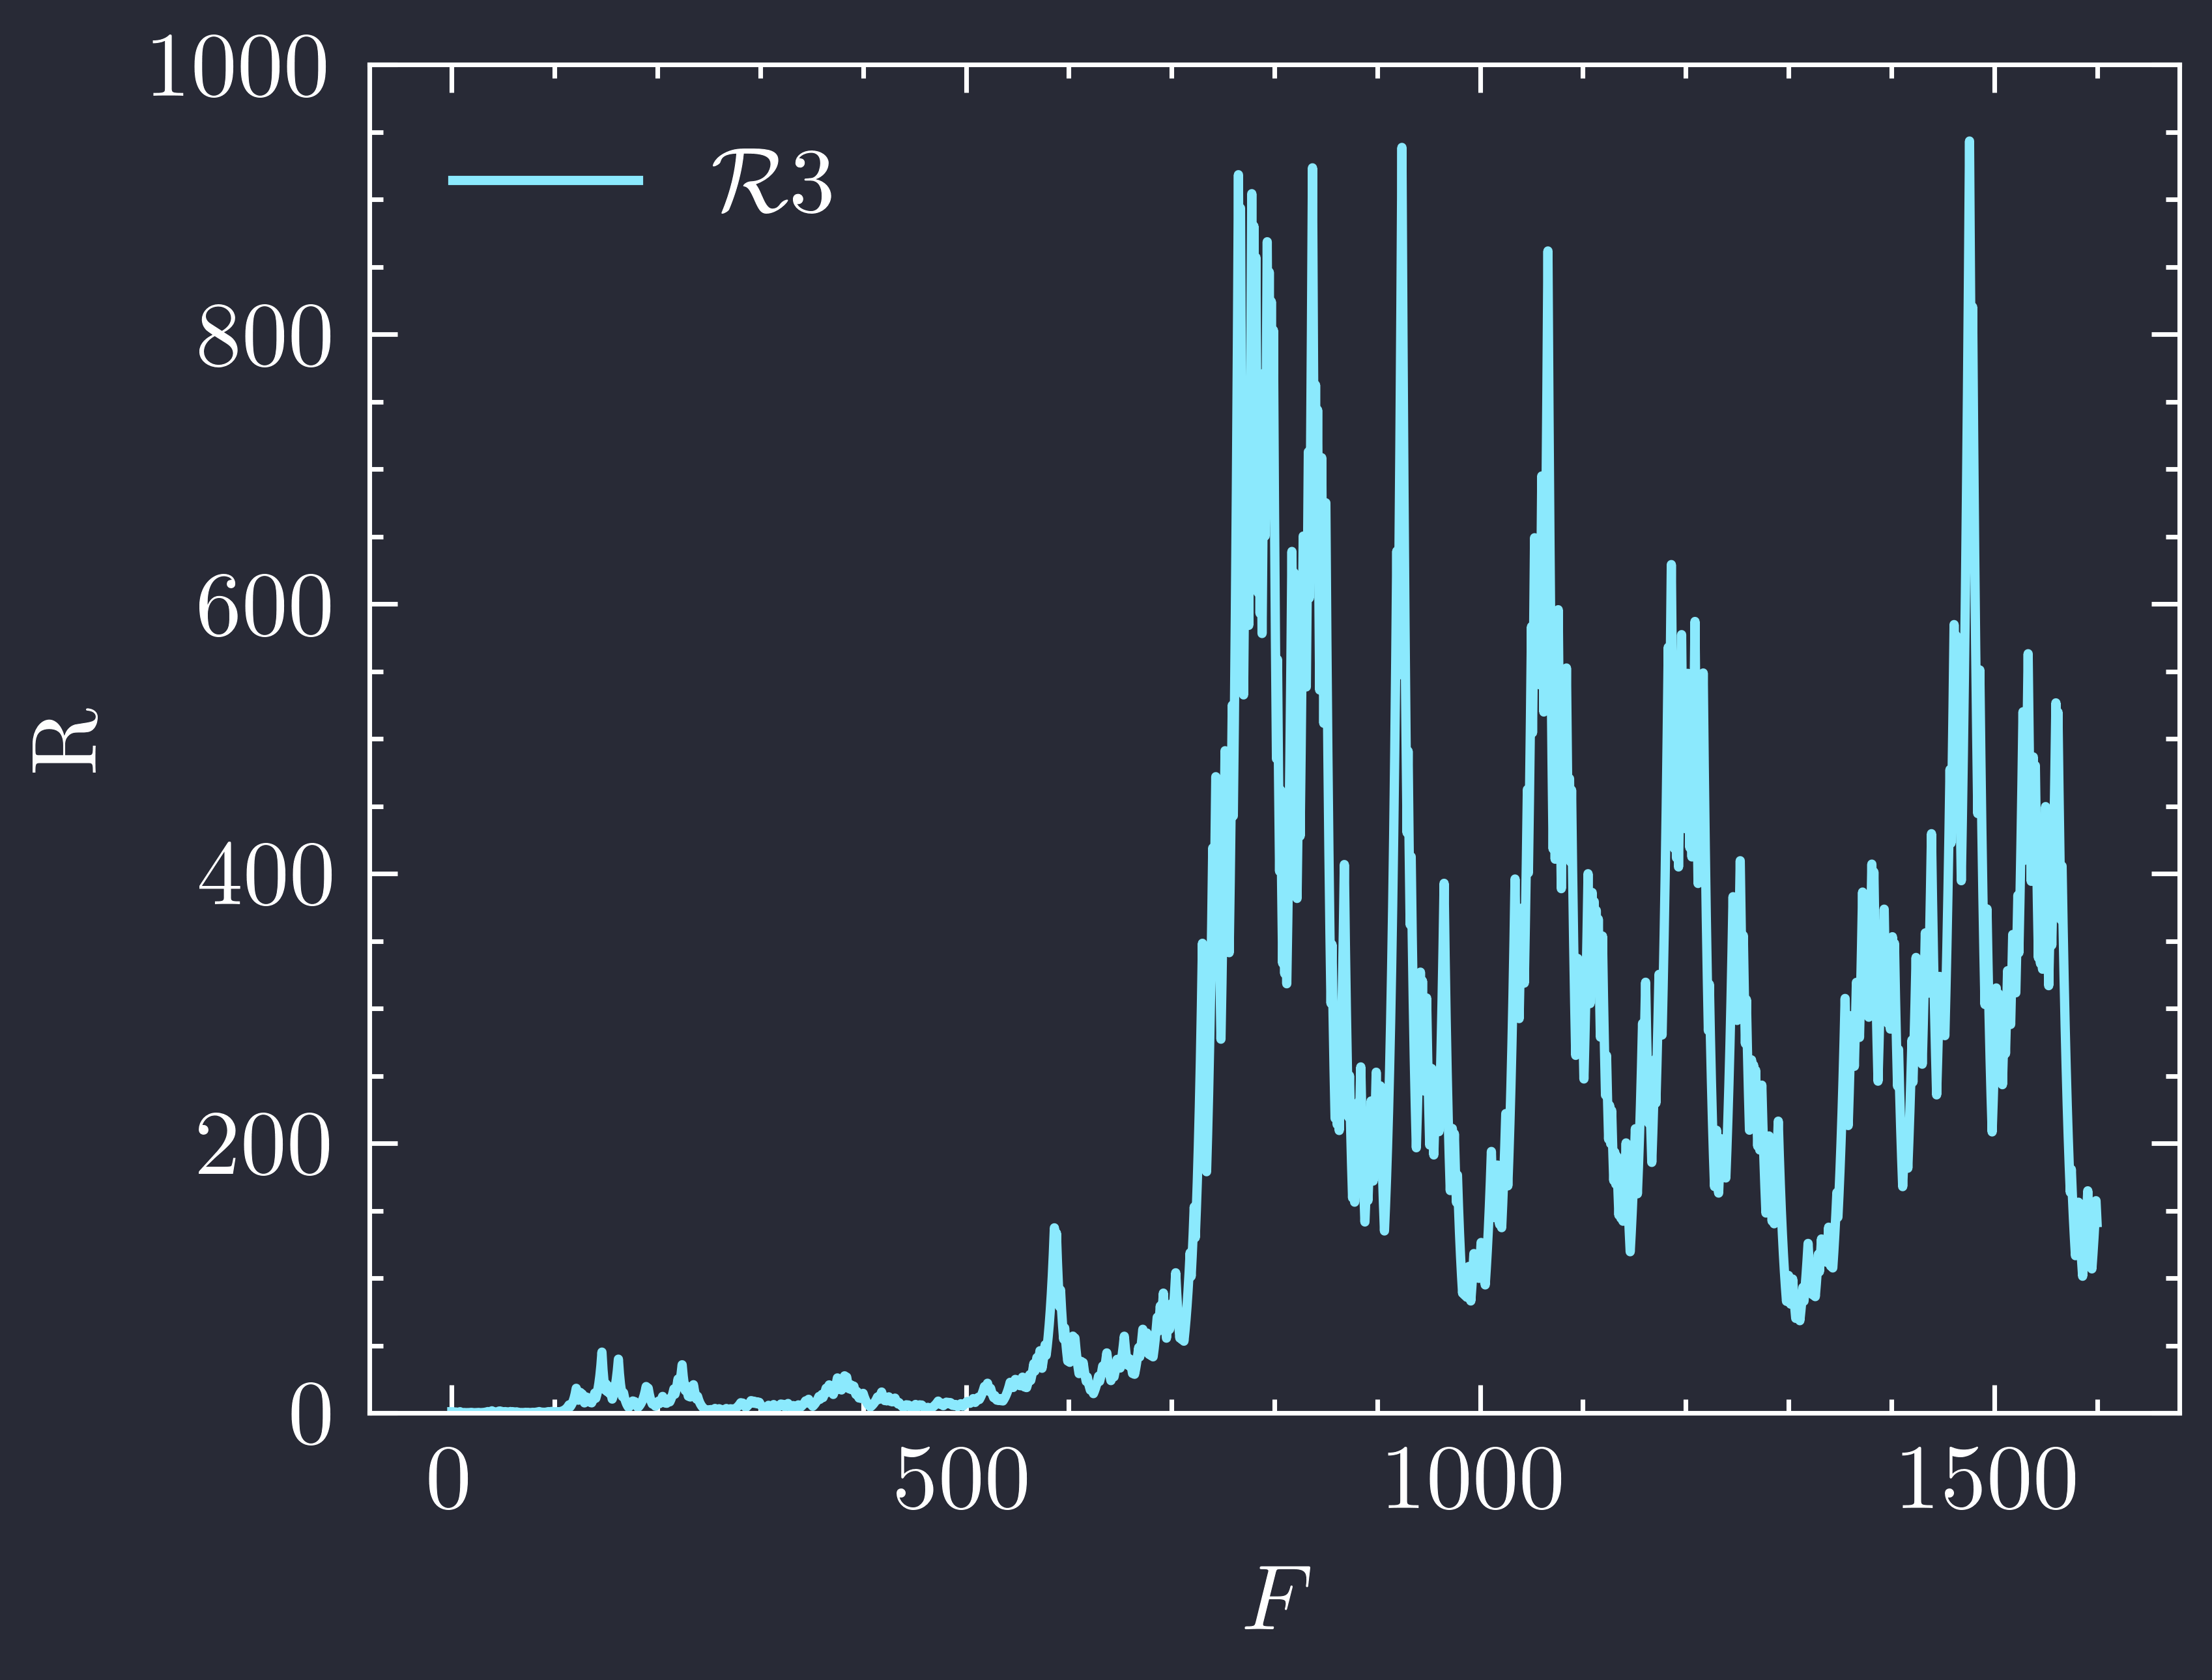

In [200]:
# back-envelope calculation for p_a close to 0.5
# for a Gaussian the width of the error bars is sigma / sqrt(n)
# the width should be less than (p_a - 0.5)
# p_a - 0.5 > sigma / sqrt(n)
# n > sigma ** 2 / (p_a - 0.5) ** 2
def backenvelope(sigma):
    return sigma ** 2 / (0.55 - 0.5) ** 2
print(backenvelope(3))
print(backenvelope(2))

l = np.arange(0, 3601)
plt.figure()
R, F_a = simulate_b(3600)
plt.plot(l, R, label='$\mathcal{R}$' + str(i+1))
plt.xlabel('$F$')
plt.ylabel('R')
plt.ylim(0, 1e3)
plt.legend()

plt.figure()
R, F_a = simulate_b(1600)
plt.plot(np.arange(0,1601), R, label='$\mathcal{R}$' + str(i+1))
plt.xlabel('$F$')
plt.ylabel('R')
plt.ylim(0, 1e3)
plt.legend()

In [214]:
# 2 e
print(np.e ** 500)

1.4035922178528e+217
